In [39]:
import numpy as np
import pandas as pd
import networkx as nx
import seaborn as sns
from scipy.integrate import ode
import pylab as plt
import statistics
from kuramoto import Kuramoto, plot_phase_coherence, plot_activity
from scipy.signal import find_peaks
import import_ipynb

import Model_Evaluation

In [13]:
# Read in the data
n0523_df = pd.read_csv('./data/n0523.csv')
data = n0523_df.values

freqs = []
curr_period = 0
i = 74647
num_osc = 10

# Sample 10 periods
for osc in range(num_osc):
    curr_period = 0
    while (data[i][0] == 0) or (data[i][0] == 1) or (data[i][0] == 2):
        i += 1
        curr_period += 1

    while (data[i][0] > 2):
        i += 1
    freqs.append(curr_period)

# Creating and training the Kuramoto model

Text(0, 0.5, '$\\sin(\\theta)$')

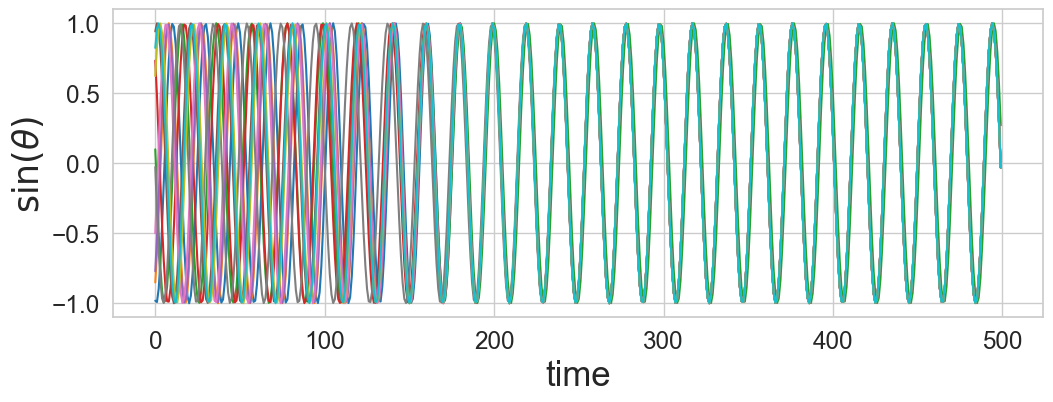

In [25]:
# @misc{kuramoto,
#   author = {Damicelli, Fabrizio},
#   title = {Python implementation of the Kuramoto model},
#   year = {2019},
#   publisher = {GitHub},
#   journal = {GitHub repository},
#   howpublished = {\url{https://github.com/fabridamicelli/kuramoto}},
# }

# Instantiate model with K=3 and w_i = freqs
test_model = Kuramoto(coupling=3, dt=0.01, T=5, natfreqs=freqs)

# Create a graph with all-to-all connectivity
graph_nx = nx.erdos_renyi_graph(n=len(freqs), p=1) # p=1 -> all-to-all connectivity
graph_test = nx.to_numpy_array(graph_nx)

# Run simulation - output is time series for all nodes (node vs time)
act_mat = test_model.run(adj_mat=graph_test)

result = np.sin(act_mat.T)
# Plot all the time series
plt.figure(figsize=(12, 4))
plt.plot(np.sin(act_mat.T))
plt.xlabel('time', fontsize=25)
plt.ylabel(r'$\sin(\theta)$', fontsize=25)

# Plotting the order parameter

<AxesSubplot: xlabel='Time', ylabel='Order parameter'>

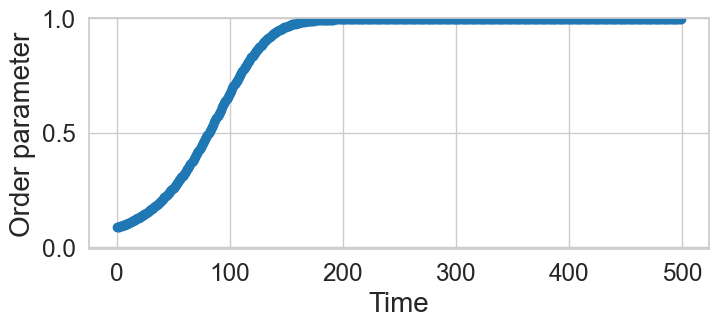

In [50]:
# Plot the order parameter
plot_phase_coherence(act_mat)

# Calculating the accuracy

In [95]:
# Plot the median of just the synchronous segment
osc_1 = []
for i in range(200,len(result)):
    osc_1.append(np.median(result[i]))

# Find all the local maxima
maxima = find_peaks(osc_1)

flashes = []
for i in range(len(osc_1)):
    if i in list(maxima[0]):
        flashes.append(1)
    else:
        flashes.append(0)

accuracy = Model_Evaluation.compare(flashes, Model_Evaluation.exp_indexes)
print("Accuracy: ", accuracy)


Accuracy:  0.9667172227839569


# Calculating the average accuracy for 100 repeated trials

In [66]:
accuracy_10 = []
trials = 100
for i in range(trials):
    test_model = Kuramoto(coupling=3, dt=0.01, T=5, natfreqs=freqs)
    act_mat = test_model.run(adj_mat=graph_test)
    result = np.sin(act_mat.T)
    osc_1 = []
    for i in range(200,len(result)):
        osc_1.append(np.median(result[i]))
    maxima = find_peaks(osc_1)
    flashes = []
    for i in range(len(osc_1)):
        if i in list(maxima[0]):
            flashes.append(1)
        else:
            flashes.append(0)
    accuracy = Model_Evaluation.compare(flashes, Model_Evaluation.exp_indexes)
    accuracy_10.append(accuracy)
print(np.mean(accuracy_10))

0.9667250870688687


# Repeating for ~25 oscillators

In [49]:
freqs_25 = []
curr_period = 0
i = 74647
num_osc_25 = 25

# Sample 10 periods
for osc in range(num_osc_25):
    curr_period = 0
    while (data[i][0] == 0) or (data[i][0] == 1) or (data[i][0] == 2):
        i += 1
        curr_period += 1

    while (data[i][0] > 2):
        i += 1
    freqs_25.append(curr_period)

# Removing outliers
for element in freqs_25:
    if element < 5:
        freqs_25.remove(element)

Text(0, 0.5, '$\\sin(\\theta)$')

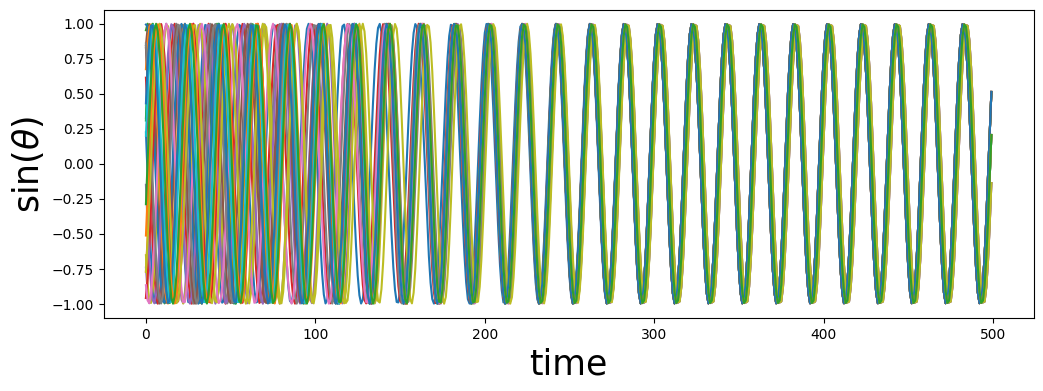

In [54]:
# Instantiate model with K=3 and w_i = freqs
test_model = Kuramoto(coupling=3, dt=0.01, T=5, natfreqs=freqs_25)

# Create a graph with all-to-all connectivity
graph_nx = nx.erdos_renyi_graph(n=len(freqs_25), p=1) # p=1 -> all-to-all connectivity
graph_test_25 = nx.to_numpy_array(graph_nx)

# Run simulation - output is time series for all nodes (node vs time)
act_mat_25 = test_model.run(adj_mat=graph_test_25)

result_25 = np.sin(act_mat_25.T)
# Plot all the time series
plt.figure(figsize=(12, 4))
plt.plot(result_25)
plt.xlabel('time', fontsize=25)
plt.ylabel(r'$\sin(\theta)$', fontsize=25)

In [57]:
# Plot the median of just the synchronous segment
osc_25 = []
for i in range(250,len(result_25)):
    osc_25.append(np.median(result_25[i]))

# Find all the local maxima
maxima_25 = find_peaks(osc_25)

flashes_25 = []
for i in range(len(osc_25)):
    if i in list(maxima_25[0]):
        flashes_25.append(1)
    else:
        flashes_25.append(0)

accuracy_25 = Model_Evaluation.compare(flashes_25, Model_Evaluation.exp_indexes)
print("Accuracy: ", accuracy_25)


Accuracy:  0.9722503089540502


In [74]:
accuracy_25_average = []
trials = 100
for i in range(trials):
    test_model = Kuramoto(coupling=3, dt=0.01, T=5, natfreqs=freqs_25)
    graph_nx = nx.erdos_renyi_graph(n=len(freqs_25), p=1)
    graph_test_25 = nx.to_numpy_array(graph_nx)
    act_mat_25 = test_model.run(adj_mat=graph_test_25)
    result_25 = np.sin(act_mat_25.T)
    osc_25 = []
    for i in range(250,len(result_25)):
        osc_25.append(np.median(result_25[i]))
    maxima_25 = find_peaks(osc_25)
    flashes_25 = []
    for i in range(len(osc_25)):
        if i in list(maxima_25[0]):
            flashes_25.append(1)
        else:
            flashes_25.append(0)
    accuracy_25 = Model_Evaluation.compare(flashes_25, Model_Evaluation.exp_indexes)
    accuracy_25_average.append(accuracy_25)
print(np.mean(accuracy_25_average))

0.9722671609931468


# Repeating for ~40 oscillators

In [58]:
freqs_40 = []
curr_period = 0
i = 74647
num_osc_40 = 40

# Sample 10 periods
for osc in range(num_osc_40):
    curr_period = 0
    while (data[i][0] == 0) or (data[i][0] == 1) or (data[i][0] == 2):
        i += 1
        curr_period += 1

    while (data[i][0] > 2):
        i += 1
    freqs_40.append(curr_period)

# Removing outliers
for element in freqs_40:
    if element < 5:
        freqs_40.remove(element)

Text(0, 0.5, '$\\sin(\\theta)$')

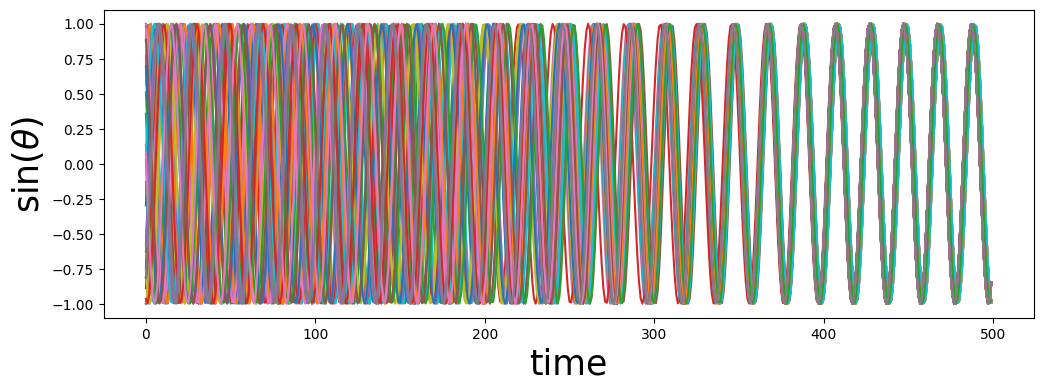

In [62]:
# Instantiate model with K=3 and w_i = freqs
test_model = Kuramoto(coupling=3, dt=0.01, T=5, natfreqs=freqs_40)

# Create a graph with all-to-all connectivity
graph_nx = nx.erdos_renyi_graph(n=len(freqs_40), p=1) # p=1 -> all-to-all connectivity
graph_test_40 = nx.to_numpy_array(graph_nx)

# Run simulation - output is time series for all nodes (node vs time)
act_mat_40 = test_model.run(adj_mat=graph_test_40)

result_40 = np.sin(act_mat_40.T)
# Plot all the time series
plt.figure(figsize=(12, 4))
plt.plot(result_40)
plt.xlabel('time', fontsize=25)
plt.ylabel(r'$\sin(\theta)$', fontsize=25)

In [63]:
# Plot the median of just the synchronous segment
osc_40 = []
for i in range(400,len(result_40)):
    osc_40.append(np.median(result_40[i]))

# Find all the local maxima
maxima_40 = find_peaks(osc_40)

flashes_40 = []
for i in range(len(osc_40)):
    if i in list(maxima_40[0]):
        flashes_40.append(1)
    else:
        flashes_40.append(0)

accuracy_40 = Model_Evaluation.compare(flashes_40, Model_Evaluation.exp_indexes)
print("Accuracy: ", accuracy_40)


Accuracy:  0.9889900011234692


In [76]:
accuracy_40_average = []
trials = 100
for i in range(trials):
    test_model = Kuramoto(coupling=3, dt=0.01, T=5, natfreqs=freqs_40)
    graph_nx = nx.erdos_renyi_graph(n=len(freqs_40), p=1)
    graph_test_40 = nx.to_numpy_array(graph_nx)
    act_mat_40 = test_model.run(adj_mat=graph_test_40)
    result_40 = np.sin(act_mat_40.T)
    osc_40 = []
    for i in range(250,len(result_40)):
        osc_40.append(np.median(result_40[i]))
    maxima_40 = find_peaks(osc_40)
    flashes_40 = []
    for i in range(len(osc_40)):
        if i in list(maxima_40[0]):
            flashes_40.append(1)
        else:
            flashes_40.append(0)
    accuracy_40 = Model_Evaluation.compare(flashes_40, Model_Evaluation.exp_indexes)
    accuracy_40_average.append(accuracy_40)
print(np.mean(accuracy_40_average))

0.9723362543534435
